# SVC iris multi

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
### 데이터 준비

In [5]:
X_train, X_test, y_train, y_test = my.get_iris(mode='bin')   #이진분류

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(80, 4) (20, 4)
(80,) (20,)


### 정규화
- 표준화 (StandarScaler)
- 최소-최대 정규화 (MinMaxScaler)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)      #X_train 학습
X_train = scaler.transform(X_train)         #numpy 배열로 변경됨 head() 사용X

In [7]:
X_train[:5]

array([[0.33333333, 0.86363636, 0.1025641 , 0.        ],
       [0.40740741, 0.36363636, 0.87179487, 0.82352941],
       [0.59259259, 0.45454545, 0.94871795, 1.        ],
       [0.40740741, 0.54545455, 0.15384615, 0.05882353],
       [1.        , 0.45454545, 0.92307692, 0.76470588]])

In [8]:
#numpy 배열로 변환 
y_train = y_train.values       #데이터 전처리 완료

### 학습

In [9]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', random_state=2022)    #linear 사용
clf.fit(X_train, y_train)


SVC(kernel='linear', random_state=2022)

In [10]:
clf.score(X_train, y_train)

1.0

In [11]:
clf.coef_          #기울기 (rbf 사용불가)

array([[ 0.61113305, -0.81845101,  1.75675951,  1.3825968 ]])

In [12]:
clf.intercept_     #절편 

array([-1.22672043])

### 최종

In [13]:
X_test = scaler.transform(X_test)
y_test = y_test.values                   #test 데이터 전처리

In [14]:
clf.score(X_test, y_test)

1.0

In [15]:
y_pred = clf.predict(X_test)

In [16]:
my.print_score(y_test, y_pred)

accuraccy: 1.0
precision: 1.0
recall: 1.0


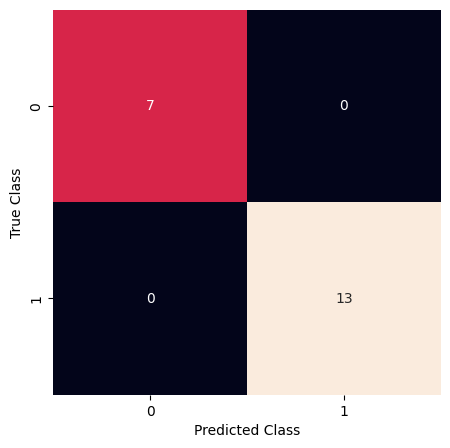

In [17]:
my.plot_confusion_matrix(y_test, y_pred)

### 다중분류

In [18]:
X_train, X_test, y_train, y_test = my.get_iris()   #다중분류

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)     #스케일링 된 X_train : numpy타입으로 변경 - head() X
y_train = y_train.values  

In [20]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', random_state=2022)    #linear 사용
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=2022)

In [21]:
clf.score(X_train, y_train)

0.9916666666666667

In [22]:
clf.coef_

array([[-0.04638537,  0.52087784, -1.00297711, -0.46410188],
       [-0.00697757,  0.17884637, -0.53848833, -0.2921261 ],
       [ 0.57399336,  1.01591853, -1.78240608, -2.14852655]])

In [23]:
clf.intercept_

array([1.45413666, 1.50691346, 5.84648493])

In [24]:
X_test = scaler.transform(X_test)
y_test = y_test.values  

In [25]:
clf.score(X_test, y_test)

0.36666666666666664

In [26]:
y_pred = clf.predict(X_test)

In [27]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [28]:
my.print_score(y_test, y_pred)

accuraccy: 0.36666666666666664
precision: 0.5245614035087719
recall: 0.4006410256410256


### 베스트 모델 찾기

In [29]:
X_train, X_test, y_train, y_test = my.get_iris()   #다중분류

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)      #X_train 학습
X_train = scaler.transform(X_train)    
y_train = y_train.values 

In [31]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

### 모델 준비

In [169]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

names = ['linear', 'linearSVC', 'poly', 'rbf', 'knn-5', 'knn-9']
models = [
    SVC(kernel='linear', C=1),
    LinearSVC(C=1, max_iter=1000),
    SVC(kernel='poly', degree=3),
    SVC(kernel='rbf', C=1, gamma=0.7),
    KNeighborsClassifier(n_neighbors=5),
    KNeighborsClassifier(n_neighbors=9)
]

scores = []                            #리스트형으로 변환

for name, model in zip(names, models):
    model.fit(X_train, y_train)
    s = model.score(X_train, y_train)
    print(name, s)
    scores.append(s)

linear 0.9666666666666667
linearSVC 0.95
poly 0.9833333333333333
rbf 0.9666666666666667
knn-5 0.9583333333333334
knn-9 0.9666666666666667


In [170]:
scores

[0.9666666666666667,
 0.95,
 0.9833333333333333,
 0.9666666666666667,
 0.9583333333333334,
 0.9666666666666667]

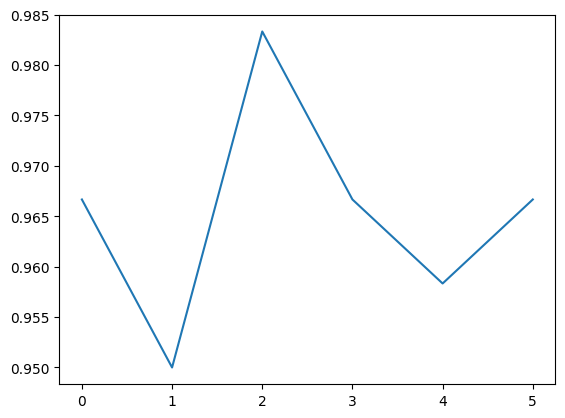

In [179]:
plt.plot(scores)

In [172]:
df = [names, scores]

In [177]:
print(df)

[['linear', 'linearSVC', 'poly', 'rbf', 'knn-5', 'knn-9'], [0.9666666666666667, 0.95, 0.9833333333333333, 0.9666666666666667, 0.9583333333333334, 0.9666666666666667]]


<BarContainer object of 6 artists>

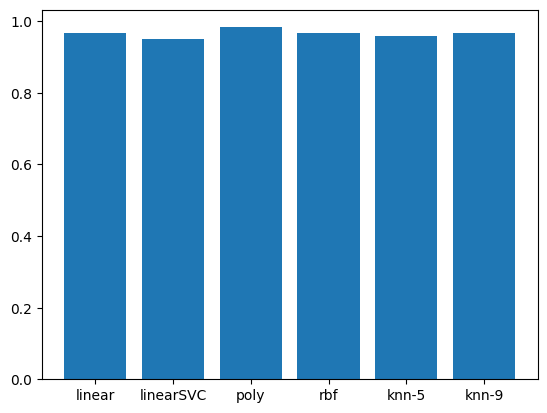

In [178]:
plt.bar(names,scores)

(array([[1., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
        [0., 6., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 2 BarContainer objects>)

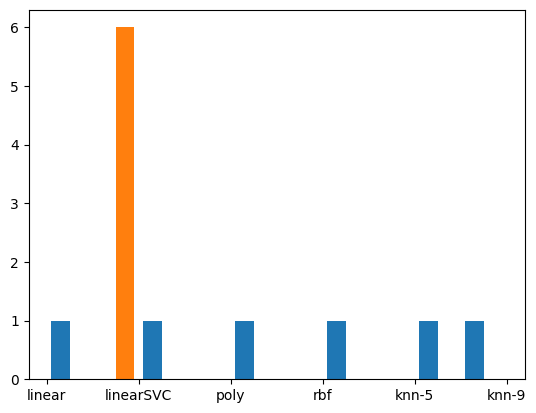

In [180]:
plt.hist(df)

### GridSearch

In [65]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [73]:
param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

params = [
    {
          'C' : param_range,
          'gamma' : param_range,
          'kernel':['rbf']
    },
    {
        'C' : param_range,
        'kernel':['linear']
    },
    {
        'C' : param_range,
        'degree':[2, 3],
        'kernel':['poly']
    }
          ]

In [96]:
from sklearn.model_selection import GridSearchCV

clf = SVC(random_state=2022)

gs = GridSearchCV(estimator=clf,
                  param_grid=params,
                  scoring='accuracy',
                  cv=3,
                  n_jobs=-1,
                  verbose=3
                 )
gs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3, estimator=SVC(random_state=2022), n_jobs=-1,
             param_grid=[{'C': [0, 1000], 'gamma': [0, 1000],
                          'kernel': ['rbf']},
                         {'C': [0, 1000], 'kernel': ['linear']},
                         {'C': [0, 1000], 'degree': [2, 3],
                          'kernel': ['poly']}],
             scoring='accuracy', verbose=3)

In [77]:
gs.best_estimator_

SVC(C=10, gamma=1, random_state=2022)

In [78]:
gs.best_score_

0.9833333333333334

In [118]:
gs.best_params_

{'C': 1000, 'kernel': 'linear'}

In [117]:
clf = gs.best_estimator_
clf.predict(X_test)

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0,
       2, 0, 2, 1, 2, 0, 1, 2], dtype=int64)

In [ ]:
### 재학습

In [83]:
clf = SVC(C=10, gamma=1, kernel='rbf', random_state=2022)       #best_params 값으로 설정
clf.fit(X_train, y_train)

SVC(C=10, gamma=1, random_state=2022)

In [84]:
clf.score(X_train, y_train)

0.975

In [85]:
clf.score(X_test, y_test)

0.43333333333333335

In [86]:
X_test = scaler.transform(X_test)    

y_test = y_test.values             #test 데이터 스케일링

In [87]:
clf.score(X_test, y_test)

0.9333333333333333

In [ ]:
### RandomizedSearchCV

In [92]:
from sklearn.model_selection import RandomizedSearchCV

In [105]:
param_range = [0, 1000]

params = [
    {
          'C' : param_range,
          'gamma' : param_range,
          'kernel':['rbf']
    },
    {
        'C' : param_range,
        'kernel':['linear']
    },
    {
        'C' : param_range,
        'degree':[2, 3],
        'kernel':['poly']
    }
          ]

In [123]:
from sklearn.model_selection import RandomizedSearchCV

clf = SVC(random_state=2022)

rs = RandomizedSearchCV(estimator=clf,
                        param_distributions=params,
                        scoring='accuracy',
                        cv=3,
                        n_jobs=-1,
                        verbose=3
                       )
                        
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVC(random_state=2022), n_jobs=-1,
                   param_distributions=[{'C': [0, 1000], 'gamma': [0, 1000],
                                         'kernel': ['rbf']},
                                        {'C': [0, 1000], 'kernel': ['linear']},
                                        {'C': [0, 1000], 'degree': [2, 3],
                                         'kernel': ['poly']}],
                   scoring='accuracy', verbose=3)

In [124]:
rs.best_params_

{'kernel': 'linear', 'C': 1000}

In [125]:
rs.best_estimator_

SVC(C=1000, kernel='linear', random_state=2022)

In [126]:
rs.best_score_

0.9583333333333334

In [127]:
clf = rs.best_estimator_
clf.predict(X_test)

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0,
       2, 0, 2, 1, 2, 0, 1, 2], dtype=int64)

In [128]:
clf = SVC(C=1000, kernel='linear', random_state=2022)       #best_params 값으로 설정
clf.fit(X_train, y_train)

SVC(C=1000, kernel='linear', random_state=2022)

In [129]:
clf.score(X_train, y_train)

0.9833333333333333